In [64]:
import time,json,ccxt,csv

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from os import getcwd,system
import matplotlib.pyplot as plt


from get_data import get_historical_from_db

In [65]:
def lire(chemin):
    with open (chemin,"r") as fichier:
        return json.load(fichier)

def enregistrer (chemin,contenu,modeLecture="w"):
    with open(chemin,modeLecture) as fichier :
        json.dump(contenu,fichier,indent=4, ensure_ascii=False, sort_keys=False )

def logs(message,chemin=str(getcwd())+"/logs.txt",affi=True):
    with open(chemin,"a") as l :
        l.write(time.ctime()+" : "+message+"\n")

In [66]:
paramètres=lire("/home/Astra_world/Astra_investissement/paramètre.json")
tf,chemin2="1h",""
chemin=getcwd()

with open(paramètres["chemin_liste_pair"],"r") as p:
    pair=p.readlines()[0]

df = get_historical_from_db(
        ccxt.binance(), 
        pair,
        tf,
        path=paramètres["chemin_binance"]
    )

In [67]:
regressor =load_model(paramètres["chemin_ia_maticusdt_1h"])

In [103]:
training_set = df.copy().loc[:"2020"]
test_set = df.copy().loc["2022":]
learn_period = 7

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set["close"].values.reshape(-1, 1))


X_train = []
y_train = []

for i in range(learn_period, len(training_set)):
    X_train.append(training_set_scaled[i-learn_period:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train[0][0:2]
real_stock_price = test_set.iloc[:, 1:2].values
dataset_total = pd.concat((training_set['close'], test_set['close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - learn_period:].values
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)
X_test = []
for i in range(learn_period, len(test_set) + learn_period):
    X_test.append(inputs[i-learn_period:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predi=predicted_stock_price
def get_column(filename, column_index):
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)
        column = []
        for row in reader:
            column.append(float(row[column_index]))
        return header[column_index], column

filename = "/home/Astra_world/Binance/1h/MATIC-USDT.csv"
column_index = 4
header, reel = get_column(filename, column_index)
reel=reel[-len(predi):]

304/304 [==============================] - 3s 9ms/step


In [107]:
dollard,btc=135.45,0
max,min=0,100
history,Time=[],[]
salaire=2000        #Le salaire est retiré tout les mois si possible
pourcentage,compteur_heure=[],0
ancien=100
c2=0                #Compte le nombre de mouvement
dico={}
lc,historys=[],[]

print(len(predi))
moins_heure=int(input("Heures: "))
if not btc:
    btc=(dollard/reel[len(predi)-moins_heure-1])
    for i in range (len(predi)-moins_heure,len(predi)):
        historys.append(btc*reel[i-1])
else:
    for i in range (len(predi)-moins_heure,len(predi)):
        historys.append(btc*reel[i-1])
dollard,btc=135.45,0

9719


1.2675 -1
2.579 0
2.576 1
2.574 2
2.583 3
2.549 4
2.574 5
2.557 6
2.561 7
Sat Jan  1 09:21:51 2022 +
2.551 8
2.542 9
2.524 10
Sat Jan  1 12:21:51 2022 -
2.515 11
Sat Jan  1 13:21:51 2022 +
2.536 12
2.522 13
2.508 14
2.541 15
2.54 16
2.569 17
2.572 18
2.58 19
2.564 20
Sat Jan  1 22:21:51 2022 -
2.551 21
2.552 22
Sun Jan  2 00:21:51 2022 +
2.572 23
2.548 24
Sun Jan  2 02:21:51 2022 -
2.538 25
Sun Jan  2 03:21:51 2022 +
2.522 26
Sun Jan  2 04:21:51 2022 -
2.535 27
Sun Jan  2 05:21:51 2022 +
2.526 28
2.532 29
2.524 30
2.529 31
2.527 32
2.539 33
2.528 34
2.521 35
2.531 36
2.519 37
2.521 38
2.533 39
2.566 40
2.554 41
Sun Jan  2 19:21:51 2022 -
2.531 42
2.521 43
2.512 44
Sun Jan  2 22:21:51 2022 +
2.513 45
2.532 46
2.55 47
2.517 48
Mon Jan  3 02:21:51 2022 -
2.515 49
Mon Jan  3 03:21:51 2022 +
2.494 50
2.474 51
2.485 52
2.497 53
2.481 54
2.487 55
2.477 56
2.483 57
2.482 58
2.51 59
2.493 60
2.488 61
2.478 62
Mon Jan  3 16:21:51 2022 -
2.465 63
Mon Jan  3 17:21:51 2022 +
2.446 64
2.458 65
2.452

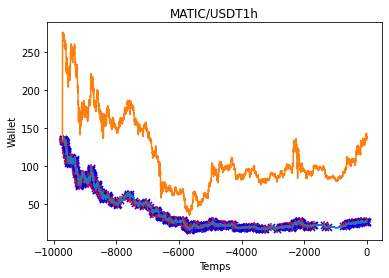

25.794234128225703


In [108]:

for i in range (len(predi)-moins_heure,len(predi)):
    compteur_heure+=1
    tt=dollard+btc*reel[i-1]
    logs(str(predi[i])+str(reel[i-1]),str(getcwd()) + "prix.txt",False)
    if predi[i]-(real_stock_price[i-1][0]*1)>0 and dollard :
        logs("+ "+str(dollard)+" ----> "+str((dollard/reel[i-1])*0.999),str(getcwd()) + "prix.txt")
        btc=(dollard/reel[i-1])*0.999
        dollard=0
        c2+=1
        plt.scatter(i-len(predi), btc*reel[i-1], color='red', s=50, marker='+')
        print(time.asctime(time.gmtime(int(time.time())+(i-len(predi)+2)*3600)),"+")
        #print(time.time(),(moins_heure,i,len(predi)))
    elif predi[i]-(real_stock_price[i-1][0]/1)<0 and btc:
        logs("- "+str(btc)+" ----> "+str((btc*reel[i-1])*0.999),str(getcwd()) + "prix.txt")
        dollard+=(btc*reel[i-1])*0.999
        btc=0
        c2+=1
        plt.scatter(i-len(predi), dollard, color='blue', s=50, marker='x')
        print(time.asctime(time.gmtime(int(time.time())+(i-len(predi)+2)*3600)),"-")
        #print(time.time(),(moins_heure,i,len(predi)))
    #-------------------Enregistre les min et max------------------------------
    if tt<min:
        min=tt
    if tt>max:
        max=tt
    #-------------------Gestion du salaire-------------------------------------
    """if compteur_heure==720:
        if dollard-2000>2000:
            dollard-=2000
            #print(True,dollard)
        elif (btc*reel[i-1])-2000>2000:
            btc-=(2000/reel[i-1])
            #print(True,btc*reel[i-1])
        else:
            #print(False)
            pass"""
    #------------------Calcule les pourcentages obtenus par mois---------------
    if compteur_heure==720:
        lc.append(c2)
        compteur_heure,c2=0,0
        if dollard:
            pourcentage.append(dollard/ancien)
            ancien=dollard
        elif btc:
            pourcentage.append(((btc*reel[i-1])/ancien))
            ancien=btc*reel[i-1]
    #-----------------Ajoute les données dans le graphique----------------------
    history.append(dollard+btc*reel[i-1])
    Time.append(i-len(predi))
plt.title(pair+tf)
plt.plot(Time, history)
plt.plot(Time, historys)
plt.xlabel('Temps')
plt.ylabel('Wallet')
plt.show()
print(tt)

In [109]:
print(135.45*reel[-1][0]/reel[len(predi)-moins_heure][0])
print(history[-1],max,min)
print(reel[-1][0],reel[len(predi)-moins_heure][0])
del tt
for i in pourcentage:
    try:
        tt*=i
        #print(tt)
    except NameError:
        tt=i
try:
    print(tt)
except NameError:
    pass
for i in lc:
    print(i)

TypeError: 'float' object is not subscriptable